### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy import *
import math

## Decline Curve Analysis

In [3]:
from scipy.optimize import curve_fit

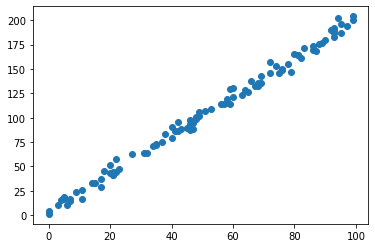

In [41]:
## Lets create example
# linear equation
# with a lot of data, the predicted slope and intercept are almost the same as the actual

x = np.random.randint(0,100,100)

y = 2*x + 3 + np.random.randn(100)*5

plt.scatter(x,y)


In [42]:
def linear_model(x,m,c):
    
    y = m * x + c
    
    return y

In [43]:
params = curve_fit(linear_model,x,y)

In [44]:
m, c = params[0]

In [45]:
m,c

(1.967835992387998, 3.927571239153484)

In [46]:
yp = linear_model(x,m,c)

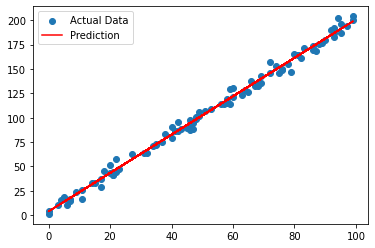

In [47]:
plt.scatter(x,y, label='Actual Data')
plt.plot(x,yp, color='red', label='Prediction')

plt.legend()


### Now lets look at how to fit a Hyperbolic model to the actual data

In [95]:
dca_df = pd.read_csv('production_rate_sample.csv',index_col=0, parse_dates=True)

dca_df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


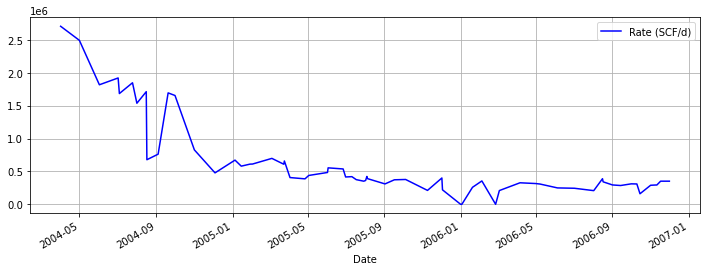

In [96]:
dca_df.plot(figsize=(12,4),color='blue')
plt.grid()

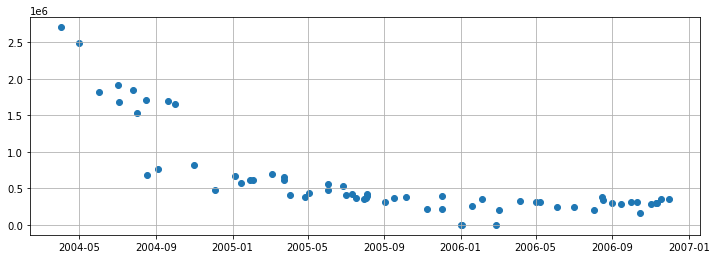

In [97]:
plt.figure(figsize=(12,4))

plt.scatter(x=dca_df.index, y= dca_df['Rate (SCF/d)'])
plt.grid()

In [98]:
def day_maker(df):
    
    days = []
    
    for d in range(len(df)):
        
        delta = df.index[d] - df.index[0]
        
        days.append(delta.days)
    
    days = np.array(days)
    
    return days



In [99]:

dca_df['days'] = day_maker(dca_df)

In [100]:
dca_df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


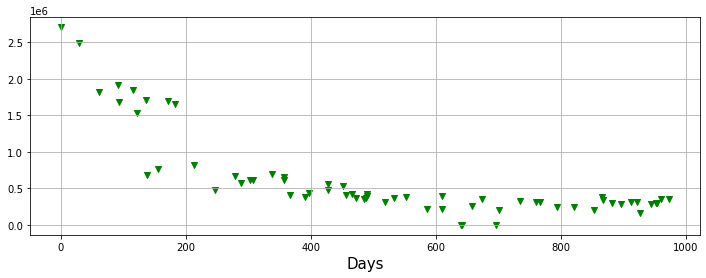

In [103]:
plt.figure(figsize=(12,4))
plt.scatter(x=dca_df['days'], y=dca_df['Rate (SCF/d)'],marker='v', color='green')

plt.xlabel('Days',size=15)

plt.grid()

In [106]:
# Write a function for the hyperbolic model

def q_hyp(t,qi,b,d):
    
    qfit  = qi/(np.abs((1 + b * d *t))**(1/b))
    
    return qfit


def hyp_fitter(q,t):
    
    # first normalize so that it converges
    q_n = q/max(q)
    t_n = t/max(t)
    
    # curve fit (optimization of parameters)
    
    params = curve_fit(q_hyp,t_n,q_n)
    
    [qi,b,d] = params[0]
    
    
    # these are for normalize tand q
    # we must re-just for q and t (non- normalized)
    
    d_f = d/max(t)
    qi_f = qi*max(q)
    
    # now we can use these parameters
    q_hyp_fit = q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit,params

In [107]:
q = dca_df['Rate (SCF/d)']
t = dca_df['days']

q_fit, params = hyp_fitter(q,t)

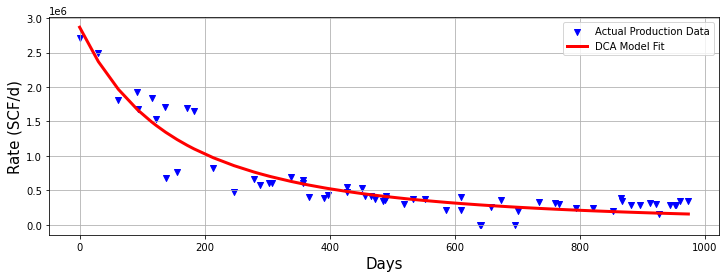

In [109]:


plt.figure(figsize=(12,4))
plt.style.use('default')
plt.scatter(t,q, marker='v', color='blue', label='Actual Production Data')
plt.plot(t,q_fit, color='red', label='DCA Model Fit',lw=3)

plt.xlabel('Days',size=15)
plt.ylabel('Rate (SCF/d)',size=15)
plt.legend()
plt.grid()

## Exploratory Data Analysis on the Volve Field

In [110]:
data = pd.read_csv('volve.csv', index_col=0, parse_dates=True)
data.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
data.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

<AxesSubplot:>

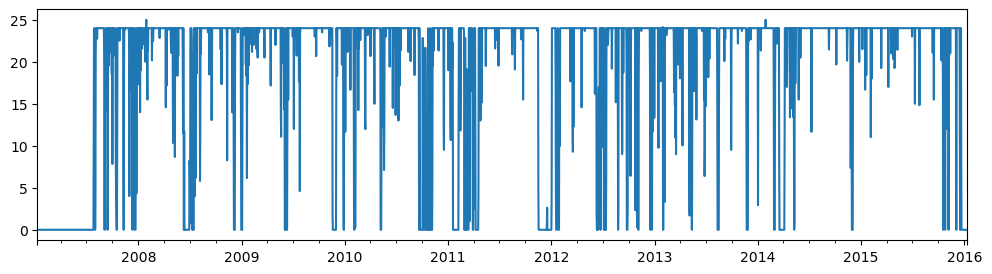

In [116]:
data['onstreaminject_HRS'].plot(figsize=(12,3))

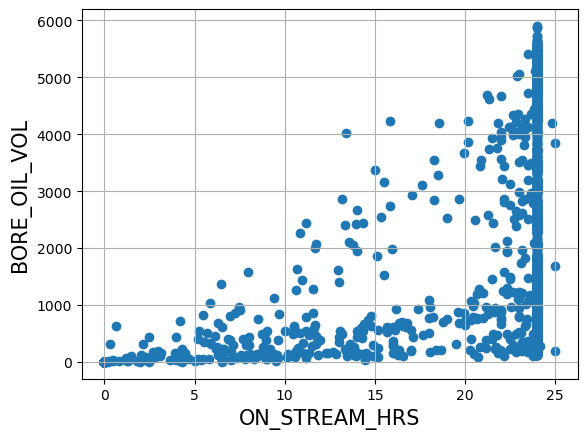

In [118]:
plt.scatter(data['ON_STREAM_HRS'], data['BORE_OIL_VOL'])
plt.ylabel('BORE_OIL_VOL',size=15)
plt.xlabel('ON_STREAM_HRS',size=15)
plt.grid()

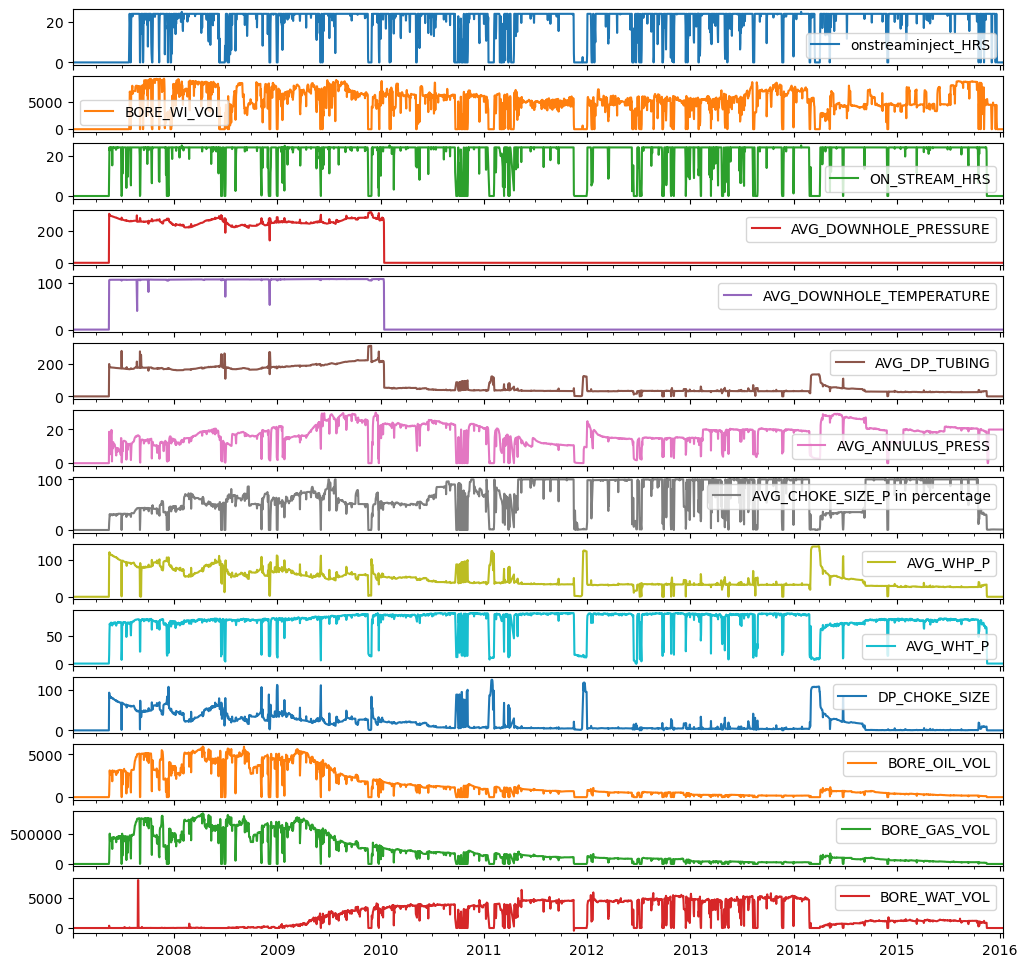

In [113]:
data.plot(subplots=True, figsize=(12,12))
plt.show()

<AxesSubplot:>

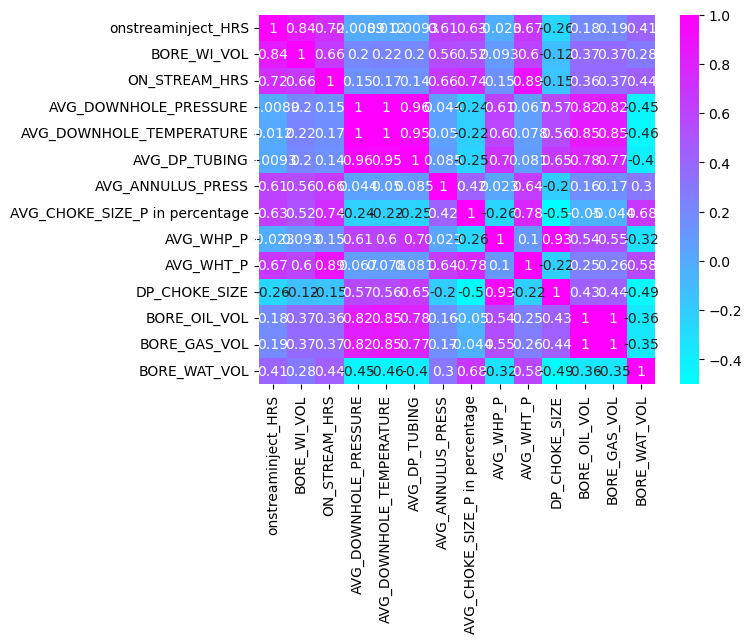

In [121]:
sns.heatmap(data.corr(),annot=True,cmap='cool')

In [122]:

data.corr()['BORE_OIL_VOL']

onstreaminject_HRS                0.182405
BORE_WI_VOL                       0.368739
ON_STREAM_HRS                     0.361124
AVG_DOWNHOLE_PRESSURE             0.819920
AVG_DOWNHOLE_TEMPERATURE          0.850241
AVG_DP_TUBING                     0.778941
AVG_ANNULUS_PRESS                 0.163663
AVG_CHOKE_SIZE_P in percentage   -0.049757
AVG_WHP_P                         0.544204
AVG_WHT_P                         0.245750
DP_CHOKE_SIZE                     0.434375
BORE_OIL_VOL                      1.000000
BORE_GAS_VOL                      0.998661
BORE_WAT_VOL                     -0.364295
Name: BORE_OIL_VOL, dtype: float64

## Null Values

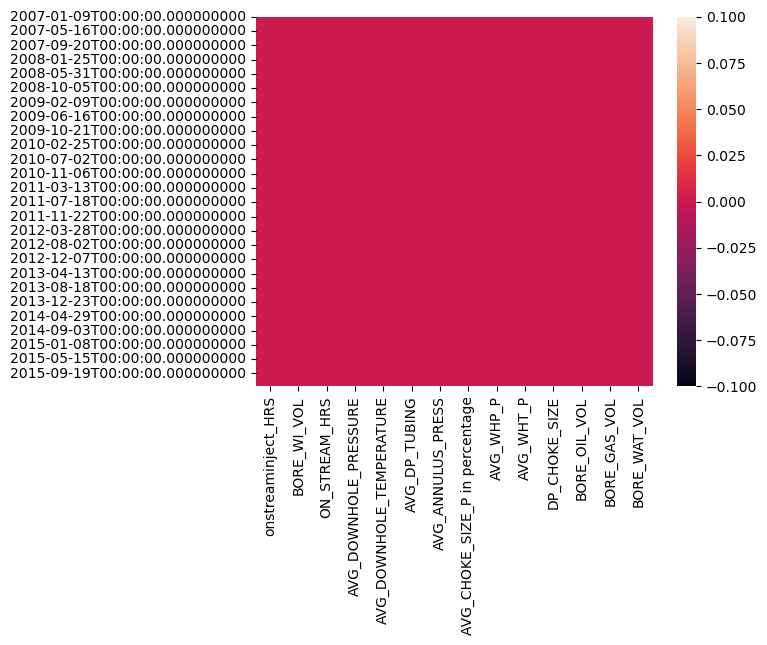

In [124]:
sns.heatmap(data.isnull())
plt.show()

In [127]:
# Descriptive Statistics

data.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


## Create a function that scales the dataset

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler